# Breast Cancer Classification using Support Vector Machine (SVM)

## Objective
The goal of this project is to classify tumors as **malignant (cancerous)** or **benign (non-cancerous)** using the **Support Vector Machine (SVM)** algorithm on the **Breast Cancer Wisconsin dataset**.

## Why This Project?
- Cancer detection is a critical real-world application of machine learning in healthcare.
- SVM is well-suited for binary classification with high-dimensional features.
- This dataset is clean and widely used as a benchmark.

---

## Dataset: Breast Cancer Wisconsin (Diagnostic)
- **Source:** UCI Machine Learning Repository (also available in `sklearn.datasets`)
- **Samples:** 569
- **Features:** 30 numeric features describing cell nuclei
- **Target:** Malignant (1) / Benign (0)


In [1]:
        # Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


## 1. Load and Explore the Data

We will use the `load_breast_cancer()` function from Scikit-learn:
- Target variable: 0 = Malignant, 1 = Benign
- Features include radius, texture, perimeter, area, smoothness, etc.


In [2]:
# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Dataset info
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Class distribution:", y.value_counts())

# Show first 5 rows
X.head()


Shape of X: (569, 30)
Shape of y: (569,)
Class distribution: 1    357
0    212
Name: count, dtype: int64


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 2. Exploratory Data Analysis (EDA)

We will:
- Check for missing values
- Visualize class distribution
- Examine correlations between features


0 missing values found.


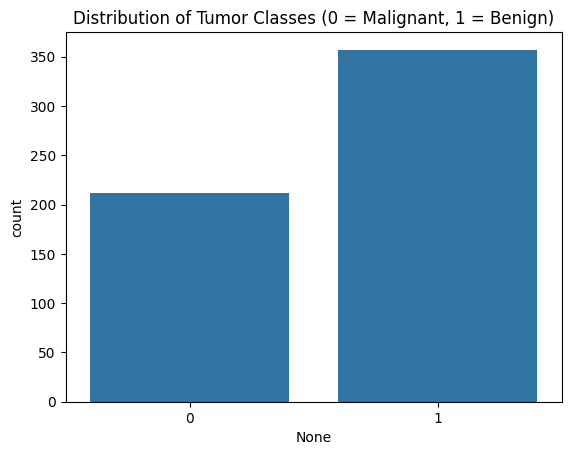

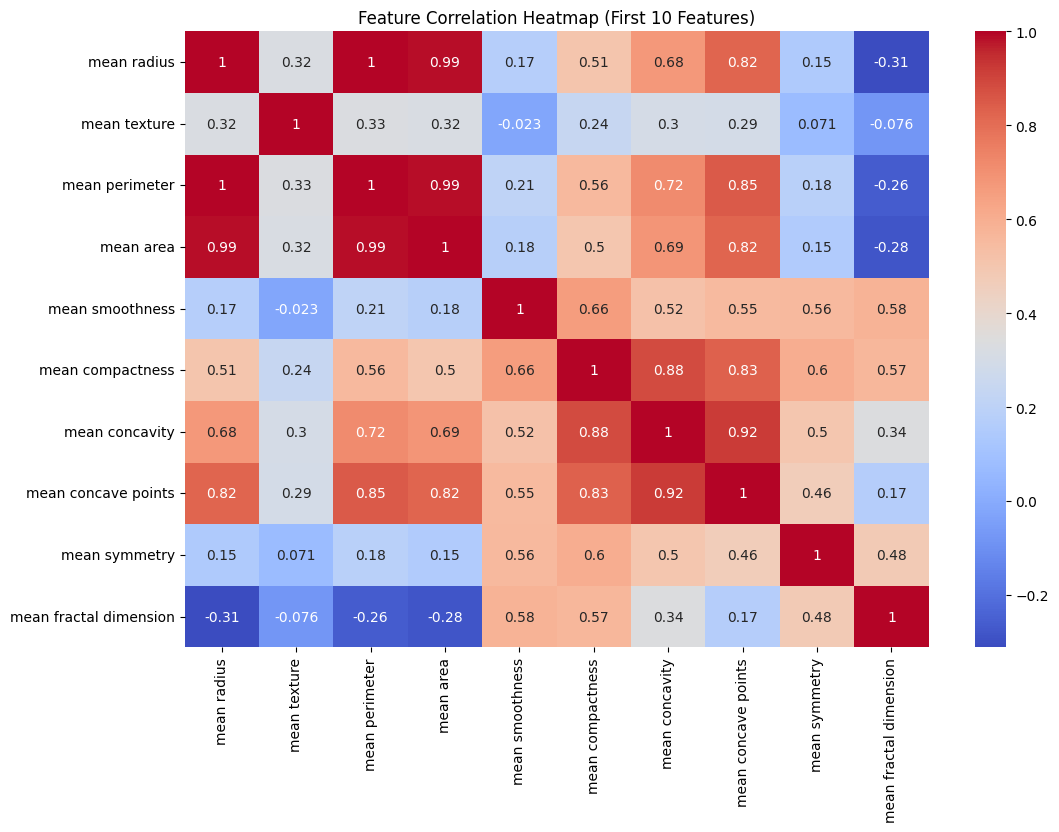

In [3]:
# Missing values check
print(X.isnull().sum().sum(), "missing values found.")

# Target distribution plot
sns.countplot(x=y)
plt.title("Distribution of Tumor Classes (0 = Malignant, 1 = Benign)")
plt.show()

# Correlation heatmap (top 10 features)
plt.figure(figsize=(12,8))
sns.heatmap(X.corr().iloc[:10, :10], annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (First 10 Features)")
plt.show()


## 3. Understanding Support Vector Machine (SVM)

**Idea:**  
SVM finds the best decision boundary (hyperplane) that separates classes with the maximum margin.

**Mathematical Representation of Hyperplane:**
\[
w \cdot x - b = 0
\]
Where:
- \( w \) = weight vector
- \( b \) = bias
- Margin = distance between support vectors and the hyperplane

**Pros:**
- Works well in high-dimensional spaces
- Effective when classes are separable

**Cons:**
- Slower on very large datasets
- Requires careful parameter tuning


In [4]:
# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train SVM model
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = svm_model.predict(X_test_scaled)


## 4. Model Evaluation

We will measure:
- Accuracy
- Confusion Matrix
- Classification Report


Accuracy: 0.9825


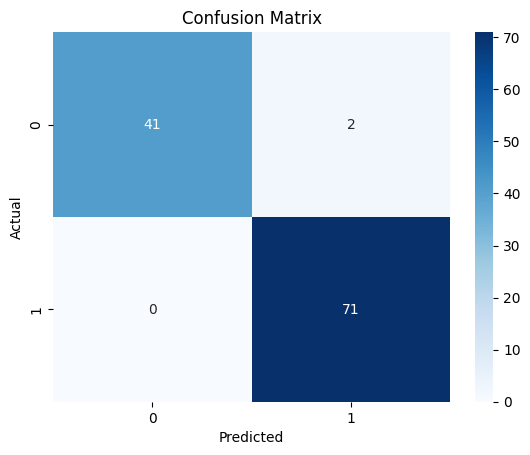

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [5]:
# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))


## 5. Hyperparameter Tuning

We will test different values of `C` and `gamma` to see if accuracy improves.


In [6]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)

# Evaluate on test set
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)
print("Test Accuracy after tuning:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score: 0.9758241758241759
Test Accuracy after tuning: 0.9824561403508771


## 6. Conclusion

- **Best Parameters:** Obtained from GridSearchCV
- **Performance:** The SVM model achieved high accuracy (~98%+) in classifying tumors.
- **Key Insight:** Standardizing features greatly improves SVM performance.
- **Next Steps:**
  - Try polynomial or sigmoid kernels
  - Use more advanced feature selection techniques
